**Logistic, LDA, CART Project**

**Project 2**

You are a statistician at the Republic of Indonesia Ministry of Health and you are provided with a data of 1473 females collected from a Contraceptive Prevalence Survey. The samples are married women who were either not pregnant or do not know if they were at the time of the survey.

The problem is to predict do/don't they use a contraceptive method of choice based on their demographic and socio-economic characteristics.

**Data Dictionary:**

1. Wife's age (numerical)
2. Wife's education (categorical) 1=uneducated, 2, 3, 4=tertiary
3. Husband's education (categorical) 1=uneducated, 2, 3, 4=tertiary
4. Number of children ever born (numerical)
5. Wife's religion (binary) Non-Scientology, Scientology
6. Wife's now working? (binary) Yes, No
7. Husband's occupation (categorical) 1, 2, 3, 4(random)
8. Standard-of-living index (categorical) 1=verlow, 2, 3, 4=high
9. Media exposure (binary) Good, Not good
10. Contraceptive method used (class attribute) No,Yes

In [1]:
# Importing the necessary packages

# For Data Wrangling/ Data Processing
import numpy as np
import pandas as pd

# Data Visualizaiton
import matplotlib.pyplot as plt   
import seaborn as sns

# For Modeling 
from sklearn.linear_model import LogisticRegression

#For Model Performance and Tuning
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

# Filtering warning message
from warnings import filterwarnings
filterwarnings("ignore")

# For Modeling 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Model Evaluation
from sklearn import metrics,model_selection

# Scaling the dataset
from sklearn.preprocessing import scale

# For Modeling 
from sklearn.tree import DecisionTreeClassifier

In [2]:
df=pd.read_excel(r'C:\Users\dell\Downloads\Contraceptive_method_dataset.xlsx')

In [3]:
df.head()

,Wife_age,Wife_ education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
0,24.0,Primary,Secondary,3.0,Scientology,No,2,High,Exposed,No
1,45.0,Uneducated,Secondary,10.0,Scientology,No,3,Very High,Exposed,No
2,43.0,Primary,Secondary,7.0,Scientology,No,3,Very High,Exposed,No
3,42.0,Secondary,Primary,9.0,Scientology,No,3,High,Exposed,No
4,36.0,Secondary,Secondary,8.0,Scientology,No,3,Low,Exposed,No


In [4]:
df.tail()

,Wife_age,Wife_ education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
1468,33.0,Tertiary,Tertiary,NaN,Scientology,Yes,2,Very High,Exposed,Yes
1469,33.0,Tertiary,Tertiary,NaN,Scientology,No,1,Very High,Exposed,Yes
1470,39.0,Secondary,Secondary,NaN,Scientology,Yes,1,Very High,Exposed,Yes
1471,33.0,Secondary,Secondary,NaN,Scientology,Yes,2,Low,Exposed,Yes
1472,17.0,Secondary,Secondary,1.0,Scientology,No,2,Very High,Exposed,Yes


In [5]:
df_head=df.head().style.background_gradient()
df_tail=df.tail().style.background_gradient()

In [6]:
import dataframe_image as dfi
dfi.export(df_head, 'df_head.png',table_conversion="matplotlib")
dfi.export(df_tail, 'df_tail.png',table_conversion="matplotlib")

In [7]:
df.shape

(1473, 10)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1402 non-null   float64
 1   Wife_ education            1473 non-null   object 
 2   Husband_education          1473 non-null   object 
 3   No_of_children_born        1452 non-null   float64
 4   Wife_religion              1473 non-null   object 
 5   Wife_Working               1473 non-null   object 
 6   Husband_Occupation         1473 non-null   int64  
 7   Standard_of_living_index   1473 non-null   object 
 8   Media_exposure             1473 non-null   object 
 9   Contraceptive_method_used  1473 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 115.2+ KB


In [9]:
df['Husband_Occupation']=df['Husband_Occupation'].astype('object')

In [10]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Wife_age,1402.0,32.61,8.27,16.0,26.0,32.0,39.0,49.0
No_of_children_born,1452.0,3.25,2.37,0.0,1.0,3.0,4.0,16.0


In [11]:
df.describe(include='all').round(2).T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Wife_age,1402.0,NaN,NaN,NaN,32.61,8.27,16.0,26.0,32.0,39.0,49.0
Wife_ education,1473,4,Tertiary,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Husband_education,1473,4,Tertiary,899,NaN,NaN,NaN,NaN,NaN,NaN,NaN
No_of_children_born,1452.0,NaN,NaN,NaN,3.25,2.37,0.0,1.0,3.0,4.0,16.0
Wife_religion,1473,2,Scientology,1253,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Wife_Working,1473,2,No,1104,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Husband_Occupation,1473.0,4.0,3.0,585.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Standard_of_living_index,1473,4,Very High,684,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Media_exposure,1473,2,Exposed,1364,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Contraceptive_method_used,1473,2,Yes,844,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df.nunique()

Wife_age                     34
Wife_ education               4
Husband_education             4
No_of_children_born          15
Wife_religion                 2
Wife_Working                  2
Husband_Occupation            4
Standard_of_living_index      4
Media_exposure                2
Contraceptive_method_used     2
dtype: int64

In [13]:
#Checking distribution in target column/variable.
df['Contraceptive_method_used'].value_counts(normalize=True)

Yes    0.57298
No     0.42702
Name: Contraceptive_method_used, dtype: float64

In [14]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
print(df.shape)

Number of duplicate rows = 80
(1473, 10)


In [15]:
80/1473*100

5.431093007467753

In [16]:
df.isna().sum()

Wife_age                     71
Wife_ education               0
Husband_education             0
No_of_children_born          21
Wife_religion                 0
Wife_Working                  0
Husband_Occupation            0
Standard_of_living_index      0
Media_exposure                0
Contraceptive_method_used     0
dtype: int64

In [17]:
for column in df.columns:
    if df[column].dtype !='object':
        med=df[column].median()
        df[column]=df[column].fillna(med)

df.isna().sum()

Wife_age                     0
Wife_ education              0
Husband_education            0
No_of_children_born          0
Wife_religion                0
Wife_Working                 0
Husband_Occupation           0
Standard_of_living_index     0
Media_exposure               0
Contraceptive_method_used    0
dtype: int64

In [18]:
df.columns

Index(['Wife_age', 'Wife_ education', 'Husband_education',
       'No_of_children_born', 'Wife_religion', 'Wife_Working',
       'Husband_Occupation', 'Standard_of_living_index', 'Media_exposure ',
       'Contraceptive_method_used'],
      dtype='object')

**EDA**

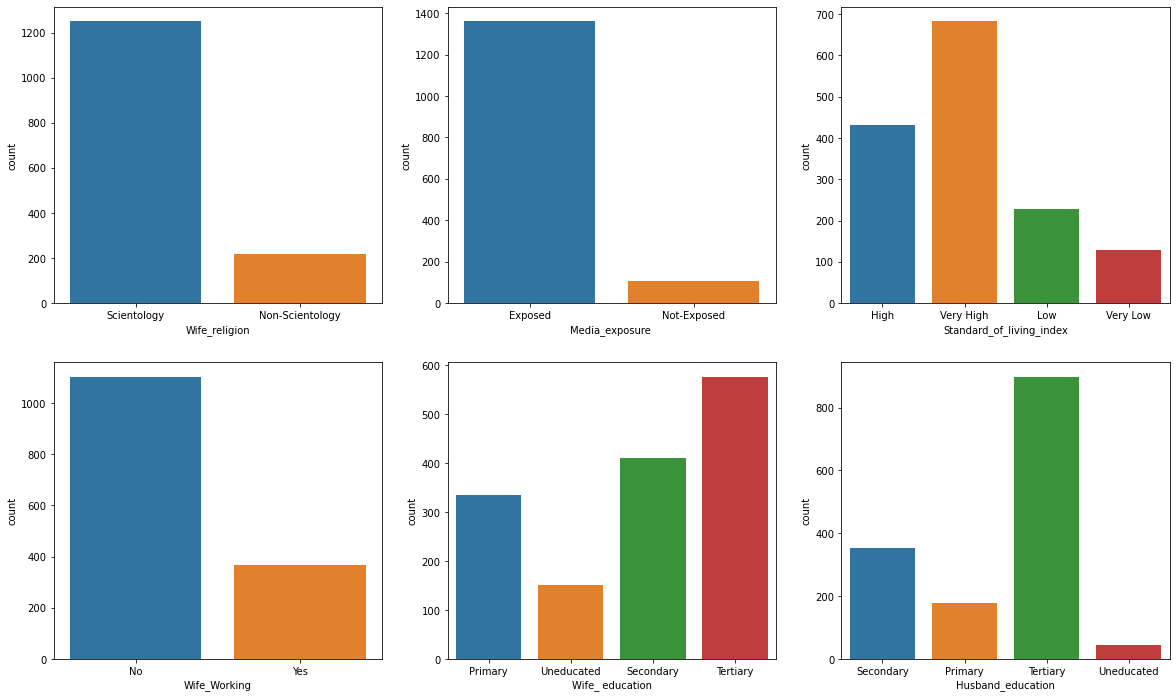

In [19]:
fig, axes = plt.subplots(nrows=2,ncols=3)
fig.set_size_inches(20,12)
sns.countplot(data=df, x='Wife_religion',ax=axes[0][0]);
sns.countplot(data=df, x='Media_exposure ',ax=axes[0][1]);
sns.countplot(data=df, x='Standard_of_living_index',ax=axes[0][2]);
sns.countplot(data=df, x='Wife_Working',ax=axes[1][0]);
sns.countplot(data=df, x='Wife_ education', ax=axes[1][1]);
sns.countplot(data=df, x='Husband_education', ax=axes[1][2]);

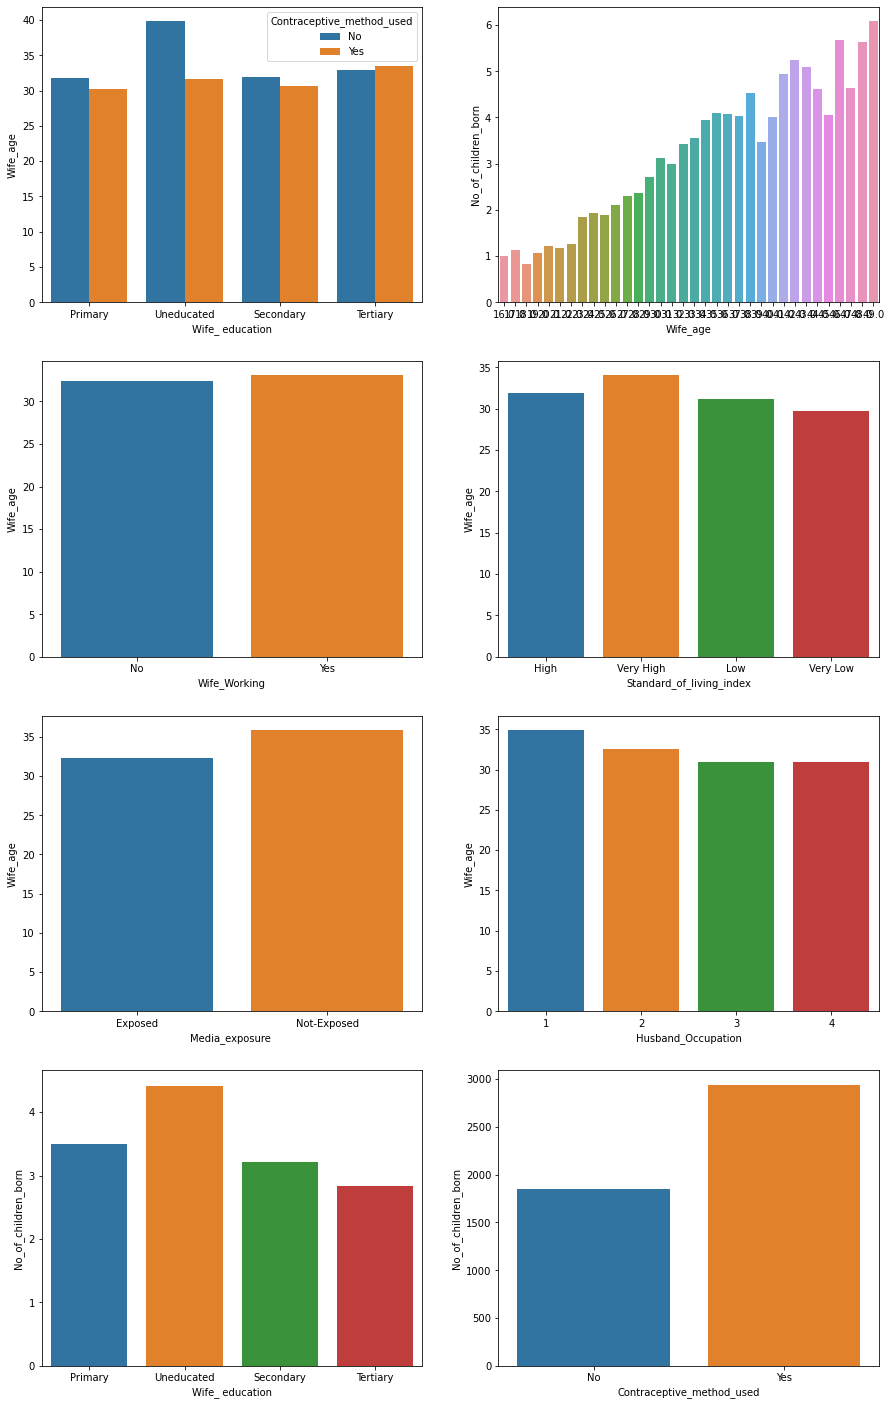

In [20]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(15,25)
sns.barplot(data=df,x='Wife_ education',y='Wife_age',hue='Contraceptive_method_used', ci=False,ax=axes[0][0]);
sns.barplot(data=df,y='No_of_children_born',x='Wife_age', ci=False,ax=axes[0][1]);
sns.barplot(data=df,x='Wife_Working',y='Wife_age', ci=False,ax=axes[1][0]);
sns.barplot(data=df,x='Standard_of_living_index',y='Wife_age', ci=False,ax=axes[1][1]);
sns.barplot(data=df,x='Media_exposure ',y='Wife_age', ci=False,ax=axes[2][0]);
sns.barplot(data=df,x='Husband_Occupation',y='Wife_age', ci=False,ax=axes[2][1]);
sns.barplot(data=df,y='No_of_children_born',x='Wife_ education', ci=False,estimator=np.mean,ax=axes[3][0]);
sns.barplot(data=df,y='No_of_children_born',x='Contraceptive_method_used', ci=False,estimator=np.sum,ax=axes[3][1]);

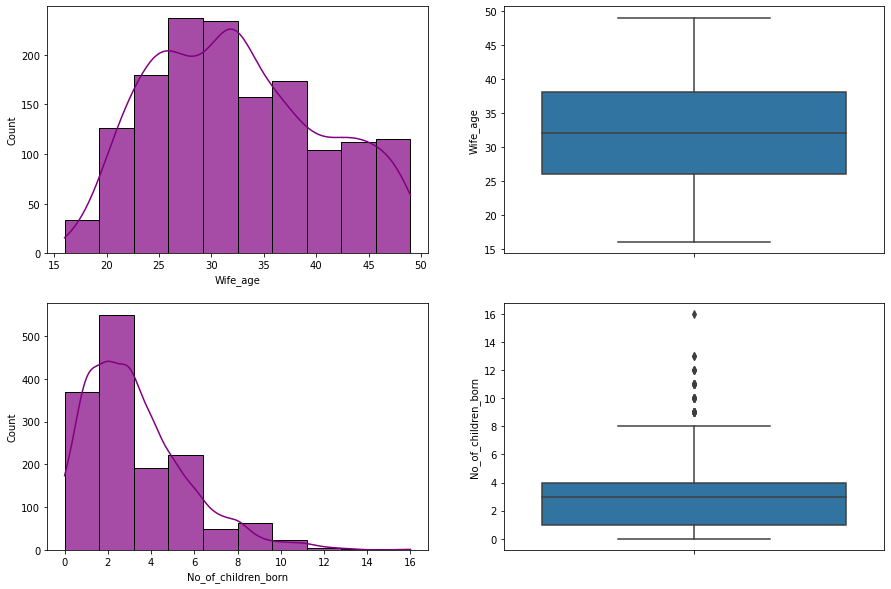

In [21]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(15,10)
sns.histplot(df['Wife_age'],bins=10,kde=True,color='purple',edgecolor='k',alpha=0.7,ax=axes[0][0]);
sns.boxplot(data=df,y='Wife_age',ax=axes[0][1]);
sns.histplot(df['No_of_children_born'],kde=True,ax=axes[1][0],bins=10,color='purple',edgecolor='k',alpha=0.7,);
sns.boxplot(data=df,y='No_of_children_born',ax=axes[1][1]);

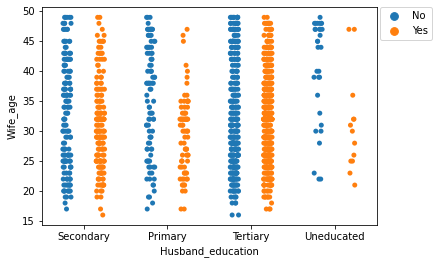

In [22]:
sns.stripplot(x ='Husband_education', y='Wife_age',data = df,jitter = True, hue ='Contraceptive_method_used', dodge = True);
plt.legend(loc=[1.01,0.85]);

In [23]:
df.columns

Index(['Wife_age', 'Wife_ education', 'Husband_education',
       'No_of_children_born', 'Wife_religion', 'Wife_Working',
       'Husband_Occupation', 'Standard_of_living_index', 'Media_exposure ',
       'Contraceptive_method_used'],
      dtype='object')

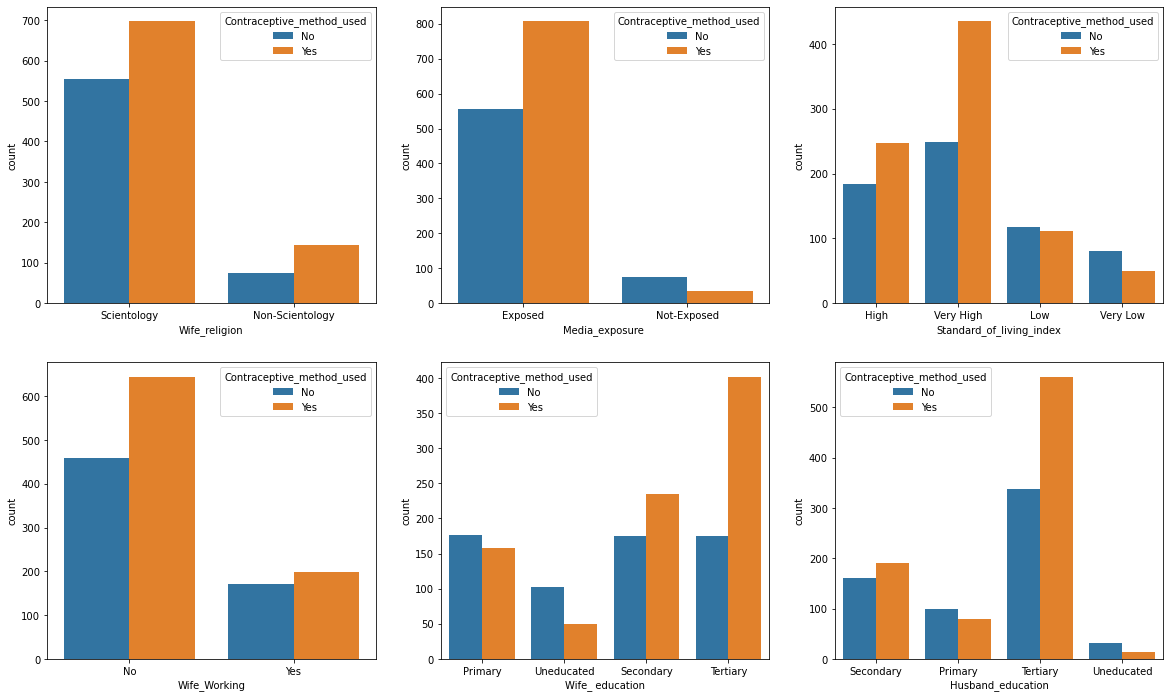

In [24]:
fig, axes = plt.subplots(nrows=2,ncols=3)
fig.set_size_inches(20,12)
sns.countplot(data=df, x='Wife_religion', hue='Contraceptive_method_used',ax=axes[0][0]);
sns.countplot(data=df, x='Media_exposure ', hue='Contraceptive_method_used',ax=axes[0][1]);
sns.countplot(data=df, x='Standard_of_living_index', hue='Contraceptive_method_used',ax=axes[0][2]);
sns.countplot(data=df, x='Wife_Working', hue='Contraceptive_method_used',ax=axes[1][0]);
sns.countplot(data=df, x='Wife_ education', hue='Contraceptive_method_used',ax=axes[1][1]);
sns.countplot(data=df, x='Husband_education', hue='Contraceptive_method_used',ax=axes[1][2]);

**Encoding the data**

In [25]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),'=== ',df[column].nunique())
        print(df[column].value_counts().sort_values(ascending=False))
        print('\n')

WIFE_ EDUCATION ===  4
Tertiary      577
Secondary     410
Primary       334
Uneducated    152
Name: Wife_ education, dtype: int64


HUSBAND_EDUCATION ===  4
Tertiary      899
Secondary     352
Primary       178
Uneducated     44
Name: Husband_education, dtype: int64


WIFE_RELIGION ===  2
Scientology        1253
Non-Scientology     220
Name: Wife_religion, dtype: int64


WIFE_WORKING ===  2
No     1104
Yes     369
Name: Wife_Working, dtype: int64


HUSBAND_OCCUPATION ===  4
3    585
1    436
2    425
4     27
Name: Husband_Occupation, dtype: int64


STANDARD_OF_LIVING_INDEX ===  4
Very High    684
High         431
Low          229
Very Low     129
Name: Standard_of_living_index, dtype: int64


MEDIA_EXPOSURE  ===  2
Exposed        1364
Not-Exposed     109
Name: Media_exposure , dtype: int64


CONTRACEPTIVE_METHOD_USED ===  2
Yes    844
No     629
Name: Contraceptive_method_used, dtype: int64




In [26]:
## We are coding up the 'WIFE_ EDUCATION, HUSBAND_EDUCATION, STANDARD_OF_LIVING_INDEX' variable in an ordinal manner

df['Wife_ education']=np.where(df['Wife_ education'] =='Uneducated', '1', df['Wife_ education'])
df['Wife_ education']=np.where(df['Wife_ education'] =='Primary', '2', df['Wife_ education'])
df['Wife_ education']=np.where(df['Wife_ education'] =='Secondary', '3', df['Wife_ education'])
df['Wife_ education']=np.where(df['Wife_ education'] =='Tertiary', '4', df['Wife_ education'])
df['Husband_education']=np.where(df['Husband_education'] =='Uneducated', '1', df['Husband_education'])
df['Husband_education']=np.where(df['Husband_education'] =='Primary', '2', df['Husband_education'])
df['Husband_education']=np.where(df['Husband_education'] =='Secondary', '3', df['Husband_education'])
df['Husband_education']=np.where(df['Husband_education'] =='Tertiary', '4', df['Husband_education'])
df['Standard_of_living_index']=np.where(df['Standard_of_living_index'] =='Very Low', '1', df['Standard_of_living_index'])
df['Standard_of_living_index']=np.where(df['Standard_of_living_index'] =='Low', '2', df['Standard_of_living_index'])
df['Standard_of_living_index']=np.where(df['Standard_of_living_index'] =='High', '3', df['Standard_of_living_index'])
df['Standard_of_living_index']=np.where(df['Standard_of_living_index'] =='Very High', '4', df['Standard_of_living_index'])

In [27]:
df['Husband_Occupation']=df['Husband_Occupation'].astype('int8')
df['Wife_ education']=df['Wife_ education'].astype('int8')
df['Husband_education']=df['Husband_education'].astype('int8')
df['Standard_of_living_index']=df['Standard_of_living_index'].astype('int8')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1473 non-null   float64
 1   Wife_ education            1473 non-null   int8   
 2   Husband_education          1473 non-null   int8   
 3   No_of_children_born        1473 non-null   float64
 4   Wife_religion              1473 non-null   object 
 5   Wife_Working               1473 non-null   object 
 6   Husband_Occupation         1473 non-null   int8   
 7   Standard_of_living_index   1473 non-null   int8   
 8   Media_exposure             1473 non-null   object 
 9   Contraceptive_method_used  1473 non-null   object 
dtypes: float64(2), int8(4), object(4)
memory usage: 74.9+ KB


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1473 non-null   float64
 1   Wife_ education            1473 non-null   int8   
 2   Husband_education          1473 non-null   int8   
 3   No_of_children_born        1473 non-null   float64
 4   Wife_religion              1473 non-null   object 
 5   Wife_Working               1473 non-null   object 
 6   Husband_Occupation         1473 non-null   int8   
 7   Standard_of_living_index   1473 non-null   int8   
 8   Media_exposure             1473 non-null   object 
 9   Contraceptive_method_used  1473 non-null   object 
dtypes: float64(2), int8(4), object(4)
memory usage: 74.9+ KB


**Find Duplicates**

In [29]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
print(df.shape)

Number of duplicate rows = 85
(1473, 10)


In [30]:
85/1473*100

5.770536320434488

In [31]:
df[dups].head()

,Wife_age,Wife_ education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
79,38.0,4,4,1.0,Scientology,Yes,1,4,Exposed,No
167,26.0,4,4,1.0,Scientology,No,1,4,Exposed,No
224,47.0,4,4,4.0,Scientology,No,1,4,Exposed,No
270,30.0,4,4,2.0,Scientology,No,1,4,Exposed,No
299,26.0,4,4,1.0,Scientology,No,1,4,Exposed,No


In [32]:
df_dups=df[dups].head().style.background_gradient()
dfi.export(df_dups, 'df_dups.png',table_conversion="matplotlib")

As some of the data from rows looks similar nut other data from same rows is unique. So should not delete the data.

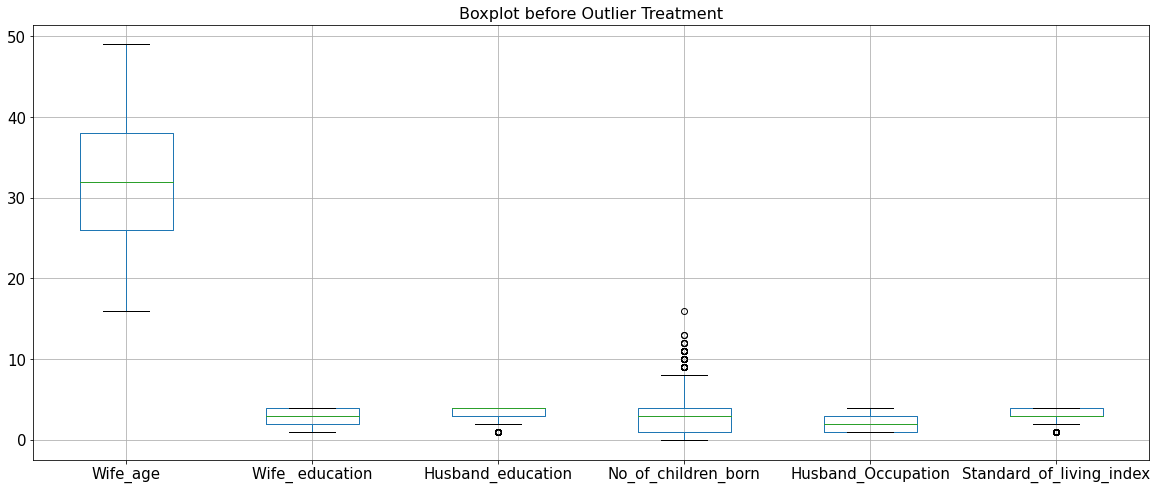

In [33]:
plt.figure(figsize=(20 ,8))
df.boxplot(grid=True);
plt.xticks(fontsize=15);
plt.yticks(fontsize=15);
plt.title('Boxplot before Outlier Treatment', fontsize=16);

In [34]:
# Position of the Outlier
print(np.where(df['No_of_children_born']>8))

(array([   1,    3,   35,   60,   95,  179,  182,  192,  200,  249,  267,
        296,  444,  485,  519,  561,  564,  653,  675,  747,  834,  955,
        993,  998,  999, 1001, 1013, 1029, 1045, 1063, 1110, 1120, 1138,
       1139, 1142, 1152, 1204, 1223, 1248, 1271, 1324, 1342, 1344, 1405,
       1415], dtype=int64),)


As uneducated females has more count of children

**Heatemap**

In [35]:
df.corr()

,Wife_age,Wife_ education,Husband_education,No_of_children_born,Husband_Occupation,Standard_of_living_index
Wife_age,1.000000,-0.039194,-0.049708,0.526923,-0.200720,0.176384
Wife_ education,-0.039194,1.000000,0.618369,-0.192009,-0.395921,0.361450
Husband_education,-0.049708,0.618369,1.000000,-0.186945,-0.337003,0.357490
No_of_children_born,0.526923,-0.192009,-0.186945,1.000000,-0.020354,-0.008994
Husband_Occupation,-0.200720,-0.395921,-0.337003,-0.020354,1.000000,-0.293831
Standard_of_living_index,0.176384,0.361450,0.357490,-0.008994,-0.293831,1.000000


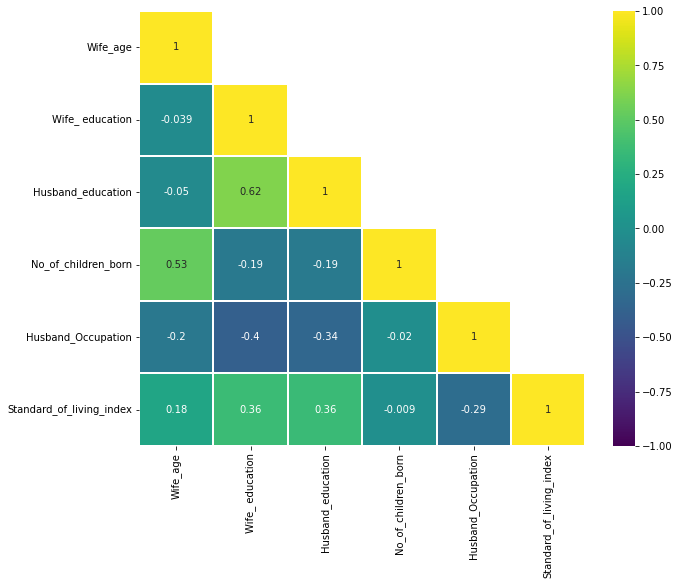

In [36]:
plt.figure(figsize=(10,8))
mask=np.array(df.corr())
mask[np.tril_indices_from(df.corr())]=False
sns.heatmap(data=df.corr(), annot =True, mask = mask, vmax =1, vmin=-1, cmap ="viridis",linewidth=1.5);

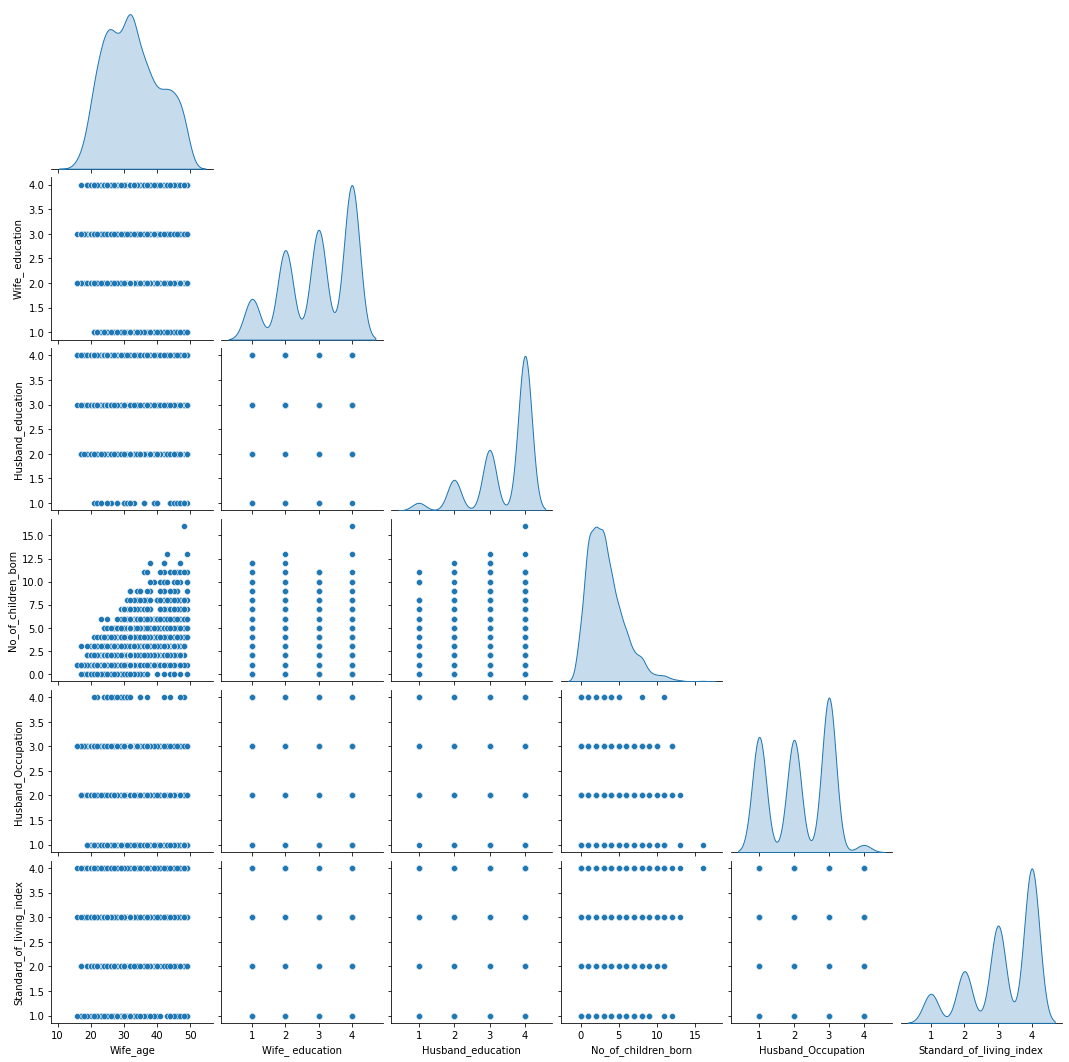

In [37]:
## Plotting a pairplot -  Checking for correlation between variables
pair=sns.pairplot(df, diag_kind='kde', corner=True)  
pair

In [38]:
## Converting the 'salary' Variable into numeric by using the LabelEncoder functionality inside sklearn.
from sklearn.preprocessing import LabelEncoder

## Defining a Label Encoder object instance
LE = LabelEncoder()

In [39]:
df['Contraceptive_method_used'] = LE.fit_transform(df['Contraceptive_method_used'])
df.head()

,Wife_age,Wife_ education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
0,24.0,2,3,3.0,Scientology,No,2,3,Exposed,0
1,45.0,1,3,10.0,Scientology,No,3,4,Exposed,0
2,43.0,2,3,7.0,Scientology,No,3,4,Exposed,0
3,42.0,3,2,9.0,Scientology,No,3,3,Exposed,0
4,36.0,3,3,8.0,Scientology,No,3,2,Exposed,0


In [40]:
#Checking distribution in target column/variable.
df['Contraceptive_method_used'].value_counts(normalize=True)

1    0.57298
0    0.42702
Name: Contraceptive_method_used, dtype: float64

In [41]:
df.tail()

,Wife_age,Wife_ education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
1468,33.0,4,4,3.0,Scientology,Yes,2,4,Exposed,1
1469,33.0,4,4,3.0,Scientology,No,1,4,Exposed,1
1470,39.0,3,3,3.0,Scientology,Yes,1,4,Exposed,1
1471,33.0,3,3,3.0,Scientology,Yes,2,2,Exposed,1
1472,17.0,3,3,1.0,Scientology,No,2,4,Exposed,1


**Converting into Dummies**

In [42]:
## Converting the 'object' type variables as dummy variables

df_dummy = pd.get_dummies(df,drop_first=True)
df_dummy.head()

,Wife_age,Wife_ education,Husband_education,No_of_children_born,Husband_Occupation,Standard_of_living_index,Contraceptive_method_used,Wife_religion_Scientology,Wife_Working_Yes,Media_exposure _Not-Exposed
0,24.0,2,3,3.0,2,3,0,1,0,0
1,45.0,1,3,10.0,3,4,0,1,0,0
2,43.0,2,3,7.0,3,4,0,1,0,0
3,42.0,3,2,9.0,3,3,0,1,0,0
4,36.0,3,3,8.0,3,2,0,1,0,0


In [43]:
df_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Wife_age                     1473 non-null   float64
 1   Wife_ education              1473 non-null   int8   
 2   Husband_education            1473 non-null   int8   
 3   No_of_children_born          1473 non-null   float64
 4   Husband_Occupation           1473 non-null   int8   
 5   Standard_of_living_index     1473 non-null   int8   
 6   Contraceptive_method_used    1473 non-null   int32  
 7   Wife_religion_Scientology    1473 non-null   uint8  
 8   Wife_Working_Yes             1473 non-null   uint8  
 9   Media_exposure _Not-Exposed  1473 non-null   uint8  
dtypes: float64(2), int32(1), int8(4), uint8(3)
memory usage: 39.0 KB


**Creating Variables for Training and Testing**

In [44]:
# Copy all the predictor variables into X dataframe
x = df_dummy.drop('Contraceptive_method_used', axis=1)

# Copy target into the y dataframe. 
y = df_dummy['Contraceptive_method_used']

In [45]:
# Split X and y into training and test set in 70:30 ratio
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30 , random_state=1,stratify=df_dummy['Contraceptive_method_used'])

In [46]:
# Checking the raito of dependent variable from train
y_train.value_counts(normalize = True)

1    0.57323
0    0.42677
Name: Contraceptive_method_used, dtype: float64

In [47]:
# Checking the raito of dependent variable from test
y_test.value_counts(normalize = True)

1    0.572398
0    0.427602
Name: Contraceptive_method_used, dtype: float64

In [48]:
x_train.shape

(1031, 9)

In [49]:
x_test.shape

(442, 9)

**Building a Model**

In [50]:
# Fit the Logistic Regression model
model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=-1)
model.fit(x_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   10.9s finished


LogisticRegression(max_iter=10000, n_jobs=-1, penalty='none',
                   solver='newton-cg', verbose=True)

In [51]:
ytrain_predict = model.predict(x_train)
ytest_predict = model.predict(x_test)

In [52]:
ytest_predict_prob=model.predict_proba(x_test)
pd.DataFrame(ytest_predict_prob).head(10)

,0,1
0,0.203735,0.796265
1,0.872767,0.127233
2,0.968475,0.031525
3,0.347707,0.652293
4,0.295384,0.704616
5,0.296185,0.703815
6,0.843035,0.156965
7,0.193006,0.806994
8,0.522064,0.477936
9,0.732733,0.267267


In [53]:
# Accuracy - Training Data
model.score(x_train, y_train)

0.6838021338506305

AUC: 0.7136


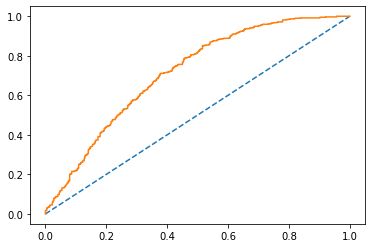

In [54]:
# predict probabilities
probs = model.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.4f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [55]:
# Accuracy - Test Data
model.score(x_test, y_test)

0.6538461538461539

AUC: 0.7136


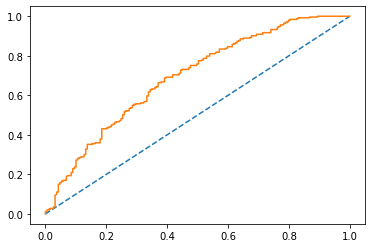

In [56]:
# predict probabilities
probs = model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.4f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

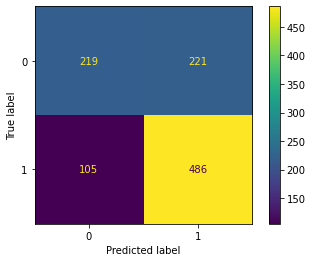

In [57]:
plot_confusion_matrix(model,x_train,y_train);

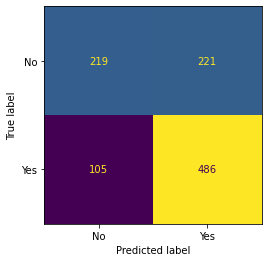

In [58]:
plot_confusion_matrix(model,x_train,y_train,display_labels= ['No', 'Yes'],colorbar =False);

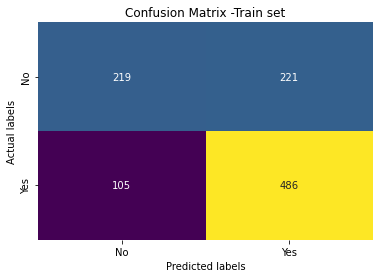

In [59]:
cm = metrics.confusion_matrix(y_train, ytrain_predict) 
sns.heatmap(cm, annot=True, fmt='.0f', cmap='viridis',
xticklabels = ['No', 'Yes'] ,
yticklabels = ['No', 'Yes'], cbar =False)

plt.title("Confusion Matrix -Train set")
plt.ylabel('Actual labels')
plt.xlabel('Predicted labels')
plt.show()

In [60]:
# Performance measures using Classification report on training set
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.68      0.50      0.57       440
           1       0.69      0.82      0.75       591

    accuracy                           0.68      1031
   macro avg       0.68      0.66      0.66      1031
weighted avg       0.68      0.68      0.67      1031



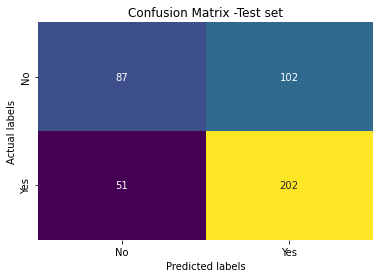

In [61]:
cm = metrics.confusion_matrix(y_test, ytest_predict) 
sns.heatmap(cm, annot=True, fmt='.0f', cmap='viridis',
xticklabels = ['No', 'Yes'] ,
yticklabels = ['No', 'Yes'], cbar =False)

plt.title("Confusion Matrix -Test set")
plt.ylabel('Actual labels')
plt.xlabel('Predicted labels')
plt.show()

In [62]:
# Performance measures using Classification report on Test set
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.63      0.46      0.53       189
           1       0.66      0.80      0.73       253

    accuracy                           0.65       442
   macro avg       0.65      0.63      0.63       442
weighted avg       0.65      0.65      0.64       442



## Applying GridSearchCV for Logistic Regression

In [63]:
grid={'penalty':['l2','none'],
      'solver':['sag','lbfgs'],
      'tol':[0.0001,0.00001]}

In [64]:
model = LogisticRegression(max_iter=10000,n_jobs=-1)

In [65]:
grid_search = GridSearchCV(estimator = model,cv=4, param_grid = grid,n_jobs=-1,scoring='f1')

In [66]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=4, estimator=LogisticRegression(max_iter=10000, n_jobs=-1),
             n_jobs=-1,
             param_grid={'penalty': ['l2', 'none'], 'solver': ['sag', 'lbfgs'],
                         'tol': [0.0001, 1e-05]},
             scoring='f1')

In [67]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'l2', 'solver': 'sag', 'tol': 0.0001} 

LogisticRegression(max_iter=10000, n_jobs=-1, solver='sag')


In [68]:
best_model = grid_search.best_estimator_

In [69]:
# Prediction on the training set

ytrain_predict = best_model.predict(x_train)
ytest_predict = best_model.predict(x_test)

In [70]:
## Getting the probabilities on the test set

ytest_predict_prob=best_model.predict_proba(x_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.203090,0.796910
1,0.868316,0.131684
2,0.966731,0.033269
3,0.344931,0.655069
4,0.294986,0.705014


              precision    recall  f1-score   support

           0       0.67      0.49      0.57       440
           1       0.69      0.82      0.75       591

    accuracy                           0.68      1031
   macro avg       0.68      0.66      0.66      1031
weighted avg       0.68      0.68      0.67      1031
 



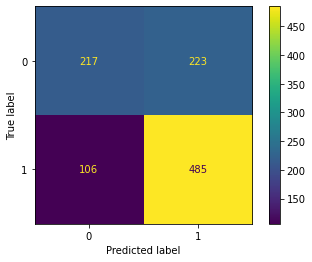

In [71]:
## Confusion matrix on the training data

plot_confusion_matrix(best_model,x_train,y_train)
print(classification_report(y_train, ytrain_predict),'\n');

              precision    recall  f1-score   support

           0       0.64      0.47      0.54       189
           1       0.67      0.81      0.73       253

    accuracy                           0.66       442
   macro avg       0.66      0.64      0.64       442
weighted avg       0.66      0.66      0.65       442
 



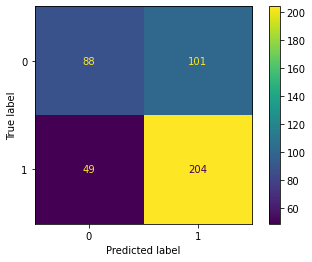

In [72]:
## Confusion matrix on the test data

plot_confusion_matrix(best_model,x_test,y_test)
print(classification_report(y_test, ytest_predict),'\n');

In [73]:
## Import the model
import statsmodels.formula.api as sm

In [74]:
df.columns

Index(['Wife_age', 'Wife_ education', 'Husband_education',
       'No_of_children_born', 'Wife_religion', 'Wife_Working',
       'Husband_Occupation', 'Standard_of_living_index', 'Media_exposure ',
       'Contraceptive_method_used'],
      dtype='object')

In [75]:
## Cleaning the coulmn names
df.columns = df.columns.str.replace(' ', '')

In [76]:
df.columns

Index(['Wife_age', 'Wife_education', 'Husband_education',
       'No_of_children_born', 'Wife_religion', 'Wife_Working',
       'Husband_Occupation', 'Standard_of_living_index', 'Media_exposure',
       'Contraceptive_method_used'],
      dtype='object')

In [77]:
exp = 'Contraceptive_method_used ~ Wife_age+Wife_education+Husband_education+No_of_children_born+Wife_religion+Wife_Working+Husband_Occupation+Standard_of_living_index+Media_exposure'

In [78]:
model_1 = sm.logit(formula =exp, data =df).fit()
model_1.summary()

Optimization terminated successfully.
         Current function value: 0.604417
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                               Logit Regression Results                              
=====================================================================================
Dep. Variable:     Contraceptive_method_used   No. Observations:                 1473
Model:                                 Logit   Df Residuals:                     1463
Method:                                  MLE   Df Model:                            9
Date:                       Sun, 13 Nov 2022   Pseudo R-squ.:                  0.1144
Time:                               21:58:31   Log-Likelihood:                -890.31
converged:                              True   LL-Null:                       -1005.3
Covariance Type:                   nonrobust   LLR p-value:                 1.723e-44
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        -0.4769      0.550     -0.867      0.386      -1.554       0.601
Wife_religion[T.Scientology]     -0.3618      0.171     -2.120      0.034      -0.696      -0.027
Wife_Working[T.Yes]              -0.1390      0.132     -1.049      0.294      -0.399       0.121
Media_exposure[T.Not-Exposed]    -0.4627      0.247     -1.877      0.061      -0.946       0.020
Wife_age                         -0.0770      0.009     -8.137      0.000      -0.096      -0.058
Wife_education                    0.5492      0.080      6.897      0.000       0.393       0.705
Husband_education                 0.0097      0.092      0.105      0.916      -0.171       0.190
No_of_children_born               0.3219      0.034      9.545      0.000       0.256       0.388
Husband_Occupation                0.0822      0.076      1.083      0.279      -0.067       0.231
Standard_of_living_index          0.2537      0.067      3.806      0.000       0.123       0.384
=================================================================================================
"""

In [79]:
df.head()

,Wife_age,Wife_education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
0,24.0,2,3,3.0,Scientology,No,2,3,Exposed,0
1,45.0,1,3,10.0,Scientology,No,3,4,Exposed,0
2,43.0,2,3,7.0,Scientology,No,3,4,Exposed,0
3,42.0,3,2,9.0,Scientology,No,3,3,Exposed,0
4,36.0,3,3,8.0,Scientology,No,3,2,Exposed,0


LDA

In [80]:
# Copy all the predictor variables into X dataframe
x = df_dummy.drop('Contraceptive_method_used', axis=1)

# Copy target into the y dataframe. 
y = df_dummy['Contraceptive_method_used']

In [81]:
# Split X and y into training and test set in 70:30 ratio
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30 , random_state=1,stratify=df_dummy['Contraceptive_method_used'])

In [82]:
# Checking on the split
print('Number of rows and columns of the training set for the independent variables:',x_train.shape)
print('Number of rows and columns of the training set for the dependent variable:',y_train.shape)
print('Number of rows and columns of the test set for the independent variables:',x_test.shape)
print('Number of rows and columns of the test set for the dependent variable:',y_test.shape)

Number of rows and columns of the training set for the independent variables: (1031, 9)
Number of rows and columns of the training set for the dependent variable: (1031,)
Number of rows and columns of the test set for the independent variables: (442, 9)
Number of rows and columns of the test set for the dependent variable: (442,)


### LDA Model

In [83]:
#Build LDA Model
clf = LinearDiscriminantAnalysis()
model=clf.fit(x_train,y_train)

### Generate Coefficients and intercept for the Linear Discriminant Function

In [84]:
#intercept value
clf.intercept_ 

array([0.12876709])

In [85]:
#coefficients for the Linear Discriminant Function
clf.coef_

array([[-0.08470515,  0.50787225, -0.02967695,  0.31524449,  0.03780564,
         0.29414804, -0.41266742, -0.17566349, -0.59054111]])

In [86]:
x_train.columns

Index(['Wife_age', 'Wife_ education', 'Husband_education',
       'No_of_children_born', 'Husband_Occupation', 'Standard_of_living_index',
       'Wife_religion_Scientology', 'Wife_Working_Yes',
       'Media_exposure _Not-Exposed'],
      dtype='object')

In [87]:
## Getting the equation
round(pd.DataFrame(clf.coef_.reshape(1,-1),columns=x_train.columns),2).T

,0
Wife_age,-0.08
Wife_ education,0.51
Husband_education,-0.03
No_of_children_born,0.32
Husband_Occupation,0.04
Standard_of_living_index,0.29
Wife_religion_Scientology,-0.41
Wife_Working_Yes,-0.18
Media_exposure _Not-Exposed,-0.59


In [88]:
# Writing the equation
for i in range(0,x_train.shape[1]):
    print('{} * {}'.format(np.round(clf.coef_[0][i],2),x_train.columns[i]),end=' (+) ')

-0.08 * Wife_age (+) 0.51 * Wife_ education (+) -0.03 * Husband_education (+) 0.32 * No_of_children_born (+) 0.04 * Husband_Occupation (+) 0.29 * Standard_of_living_index (+) -0.41 * Wife_religion_Scientology (+) -0.18 * Wife_Working_Yes (+) -0.59 * Media_exposure _Not-Exposed (+) 

In [89]:
a=clf.coef_
np.round(a,2) # rounded up coefficients 

array([[-0.08,  0.51, -0.03,  0.32,  0.04,  0.29, -0.41, -0.18, -0.59]])

### Prediction

In [90]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = model.predict(x_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = model.predict(x_test)

### Training Data and Test Data Confusion Matrix Comparison

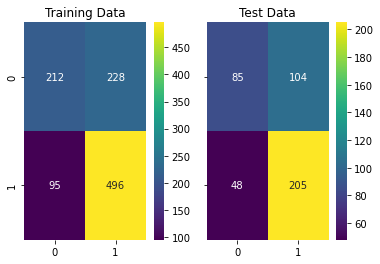

<Figure size 1440x720 with 0 Axes>

In [91]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)
plt.figure(figsize=(20,10))
;#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,pred_class_train)),annot=True,fmt='.5g',cmap='viridis',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,pred_class_test)),annot=True,fmt='.5g',cmap='viridis',ax=a[0][1]);
a[0][1].set_title('Test Data');

### Training Data and Test Data Classification Report Comparison

In [92]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.69      0.48      0.57       440
           1       0.69      0.84      0.75       591

    accuracy                           0.69      1031
   macro avg       0.69      0.66      0.66      1031
weighted avg       0.69      0.69      0.67      1031
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.64      0.45      0.53       189
           1       0.66      0.81      0.73       253

    accuracy                           0.66       442
   macro avg       0.65      0.63      0.63       442
weighted avg       0.65      0.66      0.64       442
 



### Probability prediction for the training and test data

In [93]:
# Training Data Probability Prediction
pred_prob_train = model.predict_proba(x_train)

# Test Data Probability Prediction
pred_prob_test = model.predict_proba(x_test)

In [94]:
pred_prob_train[:,1]

array([0.74012991, 0.49453695, 0.79339843, ..., 0.67173677, 0.09856762,
       0.79894524])

AUC for the Training Data: 0.714


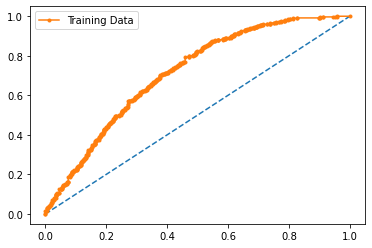

In [95]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')
# show the plot
plt.legend(loc='best')
plt.show()

AUC for the Test Data: 0.690


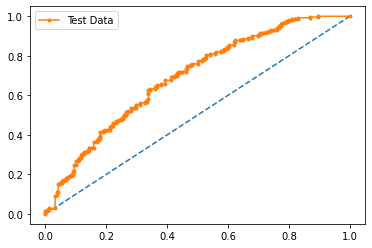

In [96]:
# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

**CART**

In [97]:
# Copy all the predictor variables into X dataframe
x = df_dummy.drop('Contraceptive_method_used', axis=1)

# Copy target into the y dataframe. 
y = df_dummy['Contraceptive_method_used']

In [98]:
# Split X and y into training and test set in 70:30 ratio
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30 , random_state=1,stratify=df_dummy['Contraceptive_method_used'])

### Building a Decision Tree Classifier

In [99]:
# Initialise a Decision Tree Classifier
dt_model = DecisionTreeClassifier(criterion = 'gini', random_state=1)

In [100]:
# Fit the model
dt_model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=1)

In [101]:
# Text and value represtation
from sklearn import tree
text_representation = tree.export_text(dt_model)
print(text_representation)

|--- feature_3 <= 0.50
|   |--- feature_0 <= 17.50
|   |   |--- class: 1
|   |--- feature_0 >  17.50
|   |   |--- feature_4 <= 3.50
|   |   |   |--- class: 0
|   |   |--- feature_4 >  3.50
|   |   |   |--- feature_1 <= 1.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_1 >  1.50
|   |   |   |   |--- class: 1
|--- feature_3 >  0.50
|   |--- feature_0 <= 37.50
|   |   |--- feature_3 <= 2.50
|   |   |   |--- feature_0 <= 34.50
|   |   |   |   |--- feature_1 <= 2.50
|   |   |   |   |   |--- feature_2 <= 1.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_2 >  1.50
|   |   |   |   |   |   |--- feature_5 <= 1.50
|   |   |   |   |   |   |   |--- feature_0 <= 21.00
|   |   |   |   |   |   |   |   |--- feature_2 <= 2.50
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- feature_2 >  2.50
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- feature_0 >  21.00
|   |   |   |   |   |   |   |   |--- fe

In [102]:
# Building a tree from dot file
from sklearn import tree

train_char_label = ['No', 'Yes']
ld_Tree_File = open('ld_Tree_File.dot','w')
dot_data = tree.export_graphviz(dt_model, 
                                out_file=ld_Tree_File, 
                                feature_names = list(x_train), 
                                class_names = list(train_char_label))

ld_Tree_File.close()

### Variable Importance

In [103]:
# Important features in your dataset
Feature_imp = pd.DataFrame()
Feature_imp["Features"]= x_train.columns
Feature_imp['Importance'] = round(pd.Series(dt_model.feature_importances_),3)
Feature_imp_sorted = Feature_imp.sort_values(by ="Importance", ascending =False)
Feature_imp_sorted

,Features,Importance
0,Wife_age,0.297
3,No_of_children_born,0.268
1,Wife_ education,0.107
2,Husband_education,0.086
4,Husband_Occupation,0.081
5,Standard_of_living_index,0.079
7,Wife_Working_Yes,0.045
6,Wife_religion_Scientology,0.028
8,Media_exposure _Not-Exposed,0.008


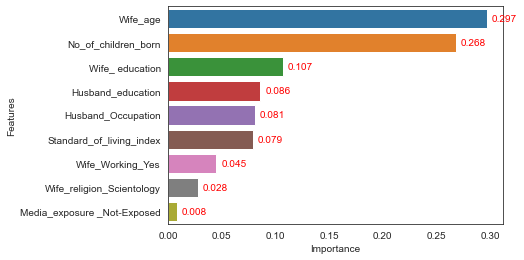

In [104]:
# Visualising the Feature Importance
sns.set_style("white")
plt.figure(figsize=(6,4))
ax = sns.barplot(x = "Importance", y = "Features", data =Feature_imp_sorted);
ax.bar_label(ax.containers[0], label_type='edge', color = 'red',rotation =0, fontsize = 10,padding =5);

### Predicting Test Data

In [105]:
# Applying the model on test data
y_predict = dt_model.predict(x_test)

In [106]:
y_predict.shape

(442,)

In [107]:
#Train Data Accuracy Score
dt_model.score(x_train,y_train) 

0.9815712900096993

In [108]:
#Train Data Accuracy Score
dt_model.score(x_test,y_test) 

0.6289592760180995

# Regularising the Decision Tree

### Adding Tuning Parameters

In [109]:
# Exploring Parameters- Learn from data
reg_dt_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 30,min_samples_leaf=100,min_samples_split=50, random_state=1)
reg_dt_model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=30, min_samples_leaf=100, min_samples_split=50,
                       random_state=1)

In [110]:
ld_tree_regularized = open('ld_tree_regularized_6.dot','w')
dot_data = tree.export_graphviz(reg_dt_model, out_file= ld_tree_regularized , feature_names = list(x_train), class_names = list(train_char_label))

ld_tree_regularized.close()
dot_data

In [111]:
# Important features in your dataset
Feature_imp_reg = pd.DataFrame()
Feature_imp_reg["Features"]= x_train.columns
Feature_imp_reg['Importance'] = round(pd.Series(reg_dt_model.feature_importances_),3)
Feature_imp_reg_sorted = Feature_imp_reg.sort_values(by ="Importance", ascending =False)
Feature_imp_reg_sorted

,Features,Importance
0,Wife_age,0.489
3,No_of_children_born,0.305
1,Wife_ education,0.199
5,Standard_of_living_index,0.007
2,Husband_education,0.000
4,Husband_Occupation,0.000
6,Wife_religion_Scientology,0.000
7,Wife_Working_Yes,0.000
8,Media_exposure _Not-Exposed,0.000


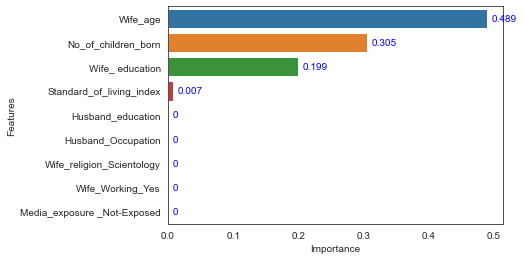

In [112]:
# Visualising the Feature Importance - Regularised
sns.set_style("white")
plt.figure(figsize=(6,4))
ax = sns.barplot(x = "Importance", y = "Features", data =Feature_imp_reg_sorted);
ax.bar_label(ax.containers[0], label_type='edge', color = 'blue',rotation =0, fontsize = 10,padding =5);

In [113]:
ytrain_predict = reg_dt_model.predict(x_train)
ytest_predict = reg_dt_model.predict(x_test)

In [114]:
print('ytrain_predict',ytrain_predict.shape)
print('ytest_predict',ytest_predict.shape)

ytrain_predict (1031,)
ytest_predict (442,)


In [115]:
ytest_predict

array([1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,

In [116]:
ytest_predict_prob=reg_dt_model.predict_proba(x_test)
ytest_predict_prob

array([[0.34710744, 0.65289256],
       [0.77876106, 0.22123894],
       [0.83333333, 0.16666667],
       [0.38095238, 0.61904762],
       [0.38095238, 0.61904762],
       [0.34710744, 0.65289256],
       [0.77876106, 0.22123894],
       [0.38095238, 0.61904762],
       [0.34710744, 0.65289256],
       [0.34710744, 0.65289256],
       [0.38095238, 0.61904762],
       [0.48214286, 0.51785714],
       [0.38095238, 0.61904762],
       [0.15555556, 0.84444444],
       [0.31818182, 0.68181818],
       [0.15555556, 0.84444444],
       [0.31818182, 0.68181818],
       [0.48214286, 0.51785714],
       [0.38095238, 0.61904762],
       [0.15555556, 0.84444444],
       [0.15555556, 0.84444444],
       [0.48214286, 0.51785714],
       [0.15555556, 0.84444444],
       [0.31818182, 0.68181818],
       [0.23214286, 0.76785714],
       [0.83333333, 0.16666667],
       [0.48214286, 0.51785714],
       [0.34710744, 0.65289256],
       [0.31818182, 0.68181818],
       [0.38095238, 0.61904762],
       [0.

In [117]:
 pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.347107,0.652893
1,0.778761,0.221239
2,0.833333,0.166667
3,0.380952,0.619048
4,0.380952,0.619048


In [118]:
#Train Data Accuracy Score
reg_dt_model.score(x_train,y_train) 

0.7002909796314258

In [119]:
#Test Data Accuracy Score
reg_dt_model.score(x_test,y_test)

0.6538461538461539

## Measuring AUC-ROC Curve

AUC: 0.739


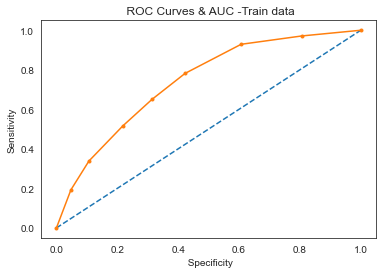

In [120]:
# predict probabilities
probs = reg_dt_model.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')

## Labelling 
plt.title(" ROC Curves & AUC -Train data")
plt.xlabel(" Specificity")
plt.ylabel("Sensitivity")

# show the plot
plt.show()

AUC: 0.715


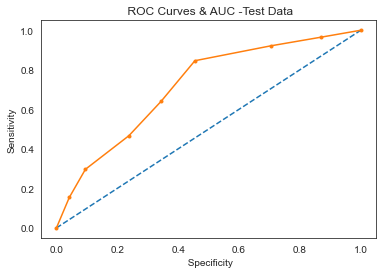

In [121]:
# predict probabilities
probs = reg_dt_model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')

## Labelling 
plt.title(" ROC Curves & AUC -Test Data")
plt.xlabel(" Specificity")
plt.ylabel("Sensitivity")

# show the plot
plt.show()

## Confusion Matrix for the training data

In [122]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics

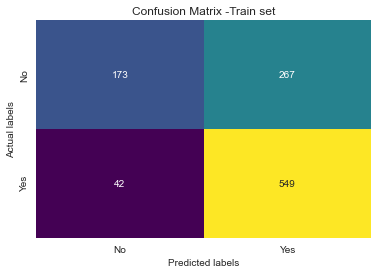

In [123]:
# Confusion Matrix on Train data
cm = metrics.confusion_matrix(y_train, ytrain_predict) 
sns.heatmap(cm, annot=True, fmt='.0f', cmap='viridis',
xticklabels = ["No", "Yes"] ,
yticklabels = ["No", "Yes"], cbar =False)

plt.title("Confusion Matrix -Train set")
plt.ylabel('Actual labels')
plt.xlabel('Predicted labels')
plt.show()

In [124]:
#Train Data Accuracy Score
reg_dt_model.score(x_train,y_train) 

0.7002909796314258

In [125]:
# Classification report
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.80      0.39      0.53       440
           1       0.67      0.93      0.78       591

    accuracy                           0.70      1031
   macro avg       0.74      0.66      0.65      1031
weighted avg       0.73      0.70      0.67      1031



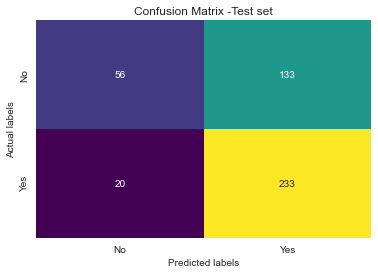

In [126]:
# Confusion Matrix on Test data
cm = metrics.confusion_matrix(y_test, ytest_predict) 
sns.heatmap(cm, annot=True, fmt='.0f', cmap='viridis',
xticklabels = ["No", "Yes"] ,
yticklabels = ["No", "Yes"], cbar =False)

plt.title("Confusion Matrix -Test set")
plt.ylabel('Actual labels')
plt.xlabel('Predicted labels')
plt.show()

In [127]:
#Test Data Accuracy Score
reg_dt_model.score(x_test,y_test)

0.6538461538461539

In [128]:
# Classification report
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.74      0.30      0.42       189
           1       0.64      0.92      0.75       253

    accuracy                           0.65       442
   macro avg       0.69      0.61      0.59       442
weighted avg       0.68      0.65      0.61       442

